##### Author contributions
Please fill out for each of the following parts who contributed to what:
- Conceived ideas: everyone
- Performed math exercises: everyone
- Performed programming exercises: everyone
- Contributed to the overall final assignment: everyone

# Chapter 8
## Hopfield networks

    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Brightspace before the deadline (see Brightspace).

Learning goals:
1. Get familiar with energy functions and with updating Hopfield networks by hand
1. Implement a Hopfield network that fulfills a constraint
1. Implement, train and test a Hopfield network on images

In [1]:
# import libraries
import urllib
import numpy as np

import skimage as ski
import skimage.transform

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# set random seed
np.random.seed(43)

### Exercise 1: Flip-flop  (2 points)
Consider a Hopfield network consisting of two binary variables $x_1$ and $x_2$ with biases $\theta_1 = 0.5$ and $\theta_2 = 0.5$, and weights $w_{ij} = -1$. This network implements a so-called flip-flop. 
1. What is the energy function of this network? *(Write down the standard form of $E(\mathbf{x})$, insert the values and simplify it.)*
1. What are the possible energy levels of this network? *(Given the possible state combinations for $x_1$ and $x_2$ in a Hopfield network, which values can $E(\mathbf{x})$ have?)*
1. What are the stable states of this network?

### Solution 1
\begin{equation*}
W = \begin{pmatrix}
0 & -1\\
-1 & 0
\end{pmatrix}
\end{equation*}

1.

$E(\mathbf{x}) = -\dfrac{1}{2} \cdot \mathbf{x}^T \cdot W \cdot \mathbf{x} - \mathbf{x}^T \cdot \mathbf{\theta}       $

$E(\mathbf{x}) = -\dfrac{1}{2} \cdot ( -1 \cdot x_1 \cdot x_2 + -1 \cdot x_2 \cdot x_1 ) - \mathbf{x}^T \cdot \mathbf{\theta}       $

$E(\mathbf{x}) = -\dfrac{1}{2} \cdot -2 \cdot x_1 \cdot x_2  - \mathbf{x}^T \cdot \mathbf{\theta}      $

$E(\mathbf{x}) = x_1 \cdot x_2  - \mathbf{x}^T \cdot \mathbf{\theta}      $

$E(\mathbf{x}) = x_1 \cdot x_2  - (x_1 \cdot 0.5 + x_2 \cdot 0.5)      $



2.

$\mathbf{x} = (0, 0)$, $E(\mathbf{x}) = 0$

$\mathbf{x} = (0, 1)$, $E(\mathbf{x}) = -0.5$

$\mathbf{x} = (1, 0)$, $E(\mathbf{x}) = -0.5$

$\mathbf{x} = (1, 1)$, $E(\mathbf{x}) = 0$




3.

$\mathbf{x} = (0, 1)$

$\mathbf{x} = (1, 0)$


### Exercise 2: Hopfield net
Consider a Hopfield network with weights
\begin{equation}
\mathbf{W} =
\left[
\begin{array}{llll}
0 & -0.2 & -0.4 & 0\\
-0.2 & 0 & 0.5 & 0.3\\
-0.4 & 0.5 & 0 & 0.8\\
0 & 0.3 & 0.8 & 0
\end{array}
\right]
\end{equation}
and biases
$\boldsymbol{\theta} = (-0.5,-0.3,-0.8,0.2)$.
1. What is the state of the Hopfield network after one sequential update of the first, second, third and fourth node when we start at the initial node state $\mathbf{x} = (0,1,1,1)$? 
1. What do you conclude from your observation?

### Solution 2  (1 point):
1\. Sequential updates:

 $ \begin{pmatrix} 
0 & -0.2 & -0.4 & 0
\end{pmatrix} \cdot 
\begin{pmatrix} 
0 \\
1 \\
1\\
1
\end{pmatrix} + \theta_1 = -0.6 + -0.5 = -1.1 < 0$, so it remains 0. So we have $\textbf{x} = (0, 1, 1, 1)$.

$ \begin{pmatrix} 
-0.2 & 0 & 0.5 & 0.3
\end{pmatrix} \cdot 
\begin{pmatrix} 
0 \\
1 \\
1\\
1
\end{pmatrix} + \theta_2 = 0.8 + -0.3 = 0.5 \geq 0$, so it remains 1. So we have $\textbf{x} = (0, 1, 1, 1)$.

$ \begin{pmatrix} 
-0.4 & 0.5 & 0 & 0.8
\end{pmatrix} \cdot 
\begin{pmatrix} 
0 \\
1 \\
1\\
1
\end{pmatrix} + \theta_3 = 1.3 + -0.8 = 0.5 \geq 0$, so it remains 1. So we have $\textbf{x} = (0, 1, 1, 1)$.

$ \begin{pmatrix} 
0 & 0.3 & 0.8 & 0
\end{pmatrix} \cdot 
\begin{pmatrix} 
0 \\
1 \\
1\\
1
\end{pmatrix} + \theta_4 = 1.1 + 0.2 = 1.3 \geq 0$, so it remains 1. So we have $\textbf{x} = (0, 1, 1, 1)$.


2\. The network is in a stable state (local minimum), as it does not change anymore.

### Exercise 3 : A Hopfield network that fulfills a constraint (2 points)

In this exercise you will run a Hopfield model that converges to a state that fulfills a constraint. 

1. Implement a function `optimize(n)` which returns a length `n` vector of node states. The constraint it should solve is that all nodes should be set to `0`, except for a single random node set to `1`.
1. Show that your function works for different values of `n`.

Start from random node states. Choose and implement the necessary weights and biases manually (i.e. you do not train the Hopfield network here). The resulting vector should be the configuration of the network when it has converged to a stable state. Make sure that your implementation fulfills all requirements for Hopfield networks to converge to stable states.

### Solution 3

In [2]:
# The optimization function
def optimize(n):
    """function to implement a constraint for a Hopfield Network"""
    states = np.random.randint(0,2,n)
    weights = np.full((n,n), -2)
    np.fill_diagonal(weights, 0)
    biases = np.full(n, 1)
    treshold = 0

    for i in range(n):
        input = np.dot(states, weights[i]) + biases[i]
        states[i] = int(input >= treshold)
        
    return states

In [3]:
for i in range(1, 20):
    states = optimize(i)
    print("{} states: {}".format(i, states))

1 states: [1]
2 states: [0 1]
3 states: [0 1 0]
4 states: [0 0 0 1]
5 states: [0 0 0 0 1]
6 states: [0 0 0 0 0 1]
7 states: [0 0 0 0 0 0 1]
8 states: [0 0 0 0 1 0 0 0]
9 states: [0 0 0 0 0 1 0 0 0]
10 states: [0 0 0 0 0 0 0 0 0 1]
11 states: [0 0 0 0 0 0 1 0 0 0 0]
12 states: [0 0 0 0 0 0 0 0 0 0 1 0]
13 states: [0 0 0 0 0 0 0 0 0 0 0 1 0]
14 states: [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
15 states: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
16 states: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
17 states: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
18 states: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
19 states: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


### Training a Hopfield network on given patterns

You will now implement a Hopfield network that learns to reconstruct given images. Here you can *a) ignore the bias term*; and *b) use bipolar nodes*. 

The next cells load an image, resize it and store it together with a mirrored version of the same image in the variables `x1` and `x2`, which will be stacked in the training data `X`. These are your *input patterns*. 

In [4]:
# The source image
f = urllib.request.urlopen("https://homepages.cae.wisc.edu/~ece533/images/watch.png")

# Read the image
x1 = mpimg.imread(f)
x1 = ski.transform.resize(x1, (76, 102), mode="reflect", anti_aliasing=True)

# Make 2D and bipolar
x1 = np.mean(x1, axis=2)
x1[x1 < np.mean(x1.flatten())] = -1 # Black
x1[x1 >= np.mean(x1.flatten())] = 1 # White
x1.astype("int32")

# Make duplicate but mirrored second image
x2 = np.fliplr(x1)

# Flatten images
sz = x1.shape
X = np.stack((x1.flatten(), x2.flatten()), axis=1)

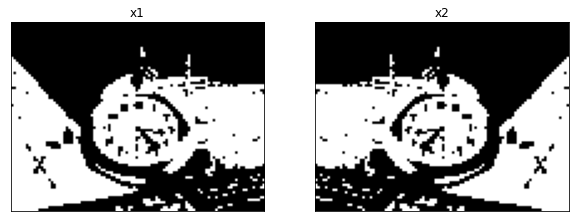

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(X[:, 0].reshape(sz), cmap="gray")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("x1")

ax[1].imshow(X[:, 1].reshape(sz), cmap="gray")
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("x2")
plt.show()

### Exercise 4: Hopfield training  (1 point)
Write a function `hopfield_train(X)` which takes the $n$ *input patterns* `X` (shape $(m,n)$) as argument and returns the weight matrix `w` for a trained Hopfield network with $m$ nodes. Initialize the weights with zeros and then implement the learning rule for the weights. Again, make sure that your network fulfills the requirements for Hopfield network convergence. 

Note that you can write the weight update term per *input pattern* in a single line using the dot product. 

### Solution 4

In [6]:
def hopfield_train(X):
    """ function to update weights of Hopfield Network"""
    # fetch network parameters
    m, n = X.shape

    # Initialize weights
    w = np.full((m,m), 0)
             
    # Hebbian learning
    for x in X.T:
        dw = np.outer(x, x)
        w = np.add(w, dw)
    
    # Avoid self-connections: requirement for Hopfield network convergence
    np.fill_diagonal(w, 0)

    return w

### Exercise 5  (1 points)
Write a function `hopfield_test(X, w, n_epochs)` which takes the $n$ initial states `X` (shape $(m,n)$) and the learned weights `w` and updates all units in random order for `n_epochs` times (i.e., which "runs" your trained Hopfield network for `n_epochs` rounds). The return value should be the updated states of the Hopfield network. Make sure that your iteration fulfills the requirements for Hopfield network convergence.

### Solution 5

In [7]:
def hopfield_test(X, w, n_epochs=10):
    """function to update Hopfield Network states"""
    # fetch network parameters
    m, n = X.shape
    
    # Loop over epochs
    for epoch in range(n_epochs):             
        # Loop over examples
        for x in X.T:
            # Loop over nodes 
            for i in np.random.permutation(m):
                # Update node
                input = np.dot(x, w[i])
                x[i] = int(input >= 0)
    
    return X

### Exercise 6  (1 points)
Train your hopfield network on the two *input patterns* in `X` and save the weights. 

### Solution 6

In [8]:
# train Hopfield Network
w = hopfield_train(X)

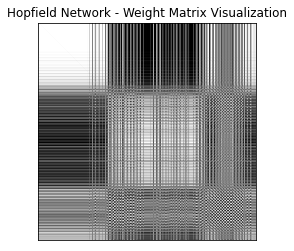

In [9]:
# visualize weight matrix
plt.figure()
plt.imshow(w, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title('Hopfield Network - Weight Matrix Visualization')
plt.show()

### Exercise 7 (2 points)

Test whether your trained Hopfield net can reconstruct the original images when starting from different degrees of corruption (which means randomly changing the pattern's node states). Make use of the function `corrupt_images` for this. 

1. Choose 4 degrees of corruption (between min: 10%, max: 100%) you want to test. Corrupt the original input images in `X` accordingly.  
1. Run your trained Hopfield network with the corrupted images as input. It may not need to run for long time. 
1. For both patterns show the original, the corrupted and the reconstructed images next to each other. 
1. For each of the degrees of corruption, comment on what you see. 

In [10]:
def corrupt_images(X, percentage=25):
    """function to corrupt images"""
    Xhat = X.copy()
    n_pixels = int(X.shape[0] * percentage / 100)
    for i_example in range(X.shape[1]):
        idx = np.random.permutation(X.shape[0])[:n_pixels]
        Xhat[idx, i_example] = 2 * np.random.randint(0, 2, n_pixels) - 1
    return Xhat

### Solution 7

In [11]:
def plot_images(X_cor, X, Y, corruption):
    """function to plot images (original and reconstructed)"""
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))

    ax[0].imshow(X_cor[:, 0].reshape(sz), cmap="gray")
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_title("Image 1 - " + str(corruption) + "% corrupted")

    ax[1].imshow(Y[:, 0].reshape(sz), cmap="gray")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title("Image 1 - reconstructed")

    ax[2].imshow(X[:, 0].reshape(sz), cmap="gray")
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    ax[2].set_title("Image 1 - original")

    fig, ax = plt.subplots(1, 3, figsize=(10, 5))

    ax[0].imshow(X_cor[:, 1].reshape(sz), cmap="gray")
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_title("Image 2 - " + str(corruption) + "% corrupted")

    ax[1].imshow(Y[:, 1].reshape(sz), cmap="gray")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title("Image 2 - reconstructed")

    ax[2].imshow(X[:, 1].reshape(sz), cmap="gray")
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    ax[2].set_title("Image 2 - original")
    plt.show()

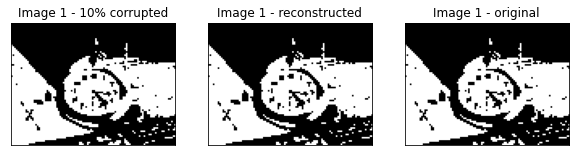

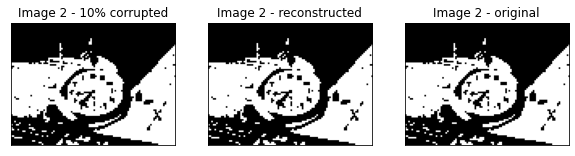

In [12]:
# Corrupt images
corruption = 10
X_cor_10 = corrupt_images(X, corruption)

# Test associative memory properties
Y_10 = hopfield_test(X_cor_10, w)

# Plot results    
plot_images(X_cor_10, X, Y_10, corruption)

The network was able to correctly identify and reconstruct the images.

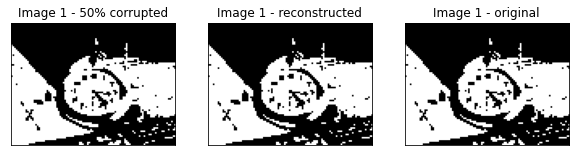

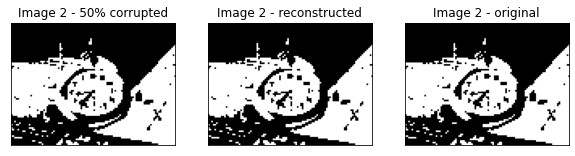

In [13]:
# Corrupt images
corruption = 50
X_cor_50 = corrupt_images(X, corruption)

# Test associative memory properties
Y_50 = hopfield_test(X_cor_50, w)

# Plot results
plot_images(X_cor_50, X, Y_50, corruption)

The network was again able to correctly identify and reconstruct the images.

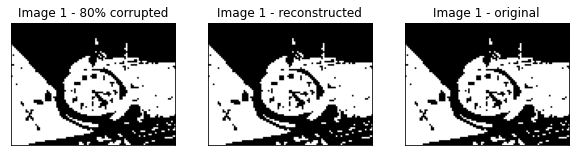

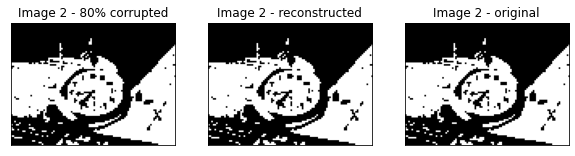

In [14]:
# Corrupt images
corruption = 80
X_cor_80 = corrupt_images(X, corruption)

# Test associative memory properties
Y_80 = hopfield_test(X_cor_80, w)

# Plot results
plot_images(X_cor_80, X, Y_80, corruption)

The network seemed to have made a 'mistake' while identifying/reconstructing image 1. This wasn't always the case (when running 80% corruption), which might have to do with the randomness of how corruption is applied and the way the network randomly updates nodes.

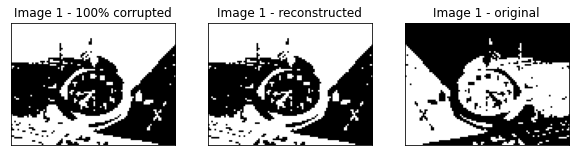

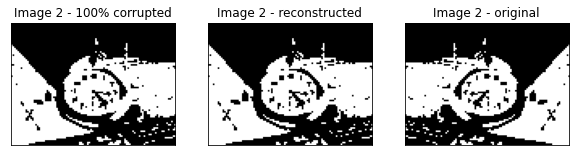

In [15]:
# Corrupt images
corruption = 100
X_cor_100 = corrupt_images(X, corruption)

# Test associative memory properties
Y_100 = hopfield_test(X_cor_100, w)

# Plot results
plot_images(X_cor_100, X, Y_100, corruption)

The images are completely random now. Sometimes it still 'guesses' the correct image, but most of the time it doesn't. The network often converges to a stable state where parts of both images are still recognizable, but mixed together with inverted colors. 